In [3]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)
#넘파이/판다스 지수표기 옵션

import warnings
warnings.filterwarnings('ignore')
#경고 무시

#  데이터 로드

In [4]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88000,0.72000,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36000,1.44000,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93000,0.15000,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69000,0.16000,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35000,0.14000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48000,1.04000,0,0,0,0,0,0,0,0
1769074,40545364,405475,536475,23,20201230,4213000000,1.21000,0.32000,0,0,0,0,0,0,0,0
1769075,40645144,406475,514475,23,20201230,4213000000,1.28000,0.30000,0,0,0,0,0,0,0,0
1769076,40745144,407475,514475,23,20201230,4213000000,6.17000,1.47000,0,0,0,0,0,0,0,0


In [5]:
# 데이터프레임 info 함수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769078 entries, 0 to 1769077
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GRID_ID                int64  
 1   GRID_X_AXIS            int64  
 2   GRID_Y_AXIS            int64  
 3   TIME                   int64  
 4   YMD                    int64  
 5   STDG_CD                int64  
 6   FP_IDEX                float64
 7   OLD_FP_IDEX            float64
 8   RELIFPLC_DWL_IDEX      int64  
 9   RELIFPLC_ROAD_IDEX     int64  
 10  RELIFPLC_INDUST_IDEX   int64  
 11  RELIFPLC_NTR_IDEX      int64  
 12  RELIFPLC_ETC_IDEX      int64  
 13  DSP_CNT_IDEX           int64  
 14  DISEASE_DSP_IDEX       int64  
 15  DISEASE_EXCL_DSP_IDEX  int64  
dtypes: float64(2), int64(14)
memory usage: 216.0 MB


In [6]:
df["YMD"]

0          20200101
1          20200101
2          20200101
3          20200101
4          20200101
             ...   
1769073    20201230
1769074    20201230
1769075    20201230
1769076    20201230
1769077    20201230
Name: YMD, Length: 1769078, dtype: int64


- **MONTH / DAY / WEEKDAY 컬럼 추가**

In [7]:
import datetime

# 요일 0 ~ 6 정수값 return (월요일 ~ 일요일)
def get_weekday(ymd):
    yyyy = int(ymd/10000)
    mm = int(ymd%10000/100)    
    dd = int(ymd%10000%100)  
    return datetime.date(yyyy,mm,dd).weekday()

## apply 함수
df["MONTH"] = df["YMD"].apply(lambda x : int(x%10000/100) )
df["DAY"] = df["YMD"].apply(lambda x : int(x%10000%100) )
df["WEEKDAY"] = df["YMD"].apply(get_weekday)

df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,MONTH,DAY,WEEKDAY
0,38045314,380475,531475,0,20200101,4213000000,2.88000,0.72000,0,0,0,0,0,0,0,0,1,1,2
1,38045324,380475,532475,0,20200101,4213000000,9.36000,1.44000,0,0,0,0,0,0,0,0,1,1,2
2,38145354,381475,535475,0,20200101,4213000000,3.93000,0.15000,0,0,0,0,0,0,0,0,1,1,2
3,38245184,382475,518475,0,20200101,4213000000,2.69000,0.16000,0,0,0,0,0,0,0,0,1,1,2
4,38245194,382475,519475,0,20200101,4213000000,2.35000,0.14000,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48000,1.04000,0,0,0,0,0,0,0,0,12,30,2
1769074,40545364,405475,536475,23,20201230,4213000000,1.21000,0.32000,0,0,0,0,0,0,0,0,12,30,2
1769075,40645144,406475,514475,23,20201230,4213000000,1.28000,0.30000,0,0,0,0,0,0,0,0,12,30,2
1769076,40745144,407475,514475,23,20201230,4213000000,6.17000,1.47000,0,0,0,0,0,0,0,0,12,30,2


# 출동 빈도 지수 EDA

In [8]:
df["DSP_CNT_IDEX"].describe()

count   1769078.00000
mean          0.00931
std           0.10728
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          14.00000
Name: DSP_CNT_IDEX, dtype: float64

## 격자별 출동 빈도 지수 비교

**- pivot_table() : 컬럼 기준으로 데이터 변환**

In [9]:
import numpy as np

# 격자 ID 기준으로 DSP_CNT_IDEX 값을 SUM 기준으로 데이터 변환
rect_table = pd.pivot_table(df, values= "DSP_CNT_IDEX" , index=['GRID_ID'], aggfunc=np.sum)

rect_table["GRID_ID"] = rect_table.index.values
rect_table

,DSP_CNT_IDEX,GRID_ID
GRID_ID,,
37645864,1,37645864
37745114,23,37745114
37745124,8,37745124
37745144,4,37745144
37745154,13,37745154
...,...,...
44145094,1,44145094
44945564,1,44945564
45045614,1,45045614


In [10]:
## 격자별 출동빈도 지수 테이블
rect_table["DSP_CNT_IDEX"]

GRID_ID
37645864     1
37745114    23
37745124     8
37745144     4
37745154    13
            ..
44145094     1
44945564     1
45045614     1
48845074     1
49945514     1
Name: DSP_CNT_IDEX, Length: 687, dtype: int64

In [11]:
## 격자별 출동빈도 지수 테이블
rect_table["DSP_CNT_IDEX"].describe()

count    687.00000
mean      23.97962
std       88.92559
min        0.00000
25%        1.00000
50%        4.00000
75%       11.00000
max     1085.00000
Name: DSP_CNT_IDEX, dtype: float64

In [12]:
# 1년간 500번 이상 출동된 격자 ID
rect_table["DSP_CNT_IDEX"][rect_table["DSP_CNT_IDEX"] > 500]

GRID_ID
39445274     708
39545254    1085
39545274     961
39645244     511
39645264     608
Name: DSP_CNT_IDEX, dtype: int64

In [13]:
# 1년간 출동횟수가 0 인 격자 ID
rect_table["DSP_CNT_IDEX"][rect_table["DSP_CNT_IDEX"] == 0]

GRID_ID
37845174    0
37845184    0
37845214    0
37845264    0
37845274    0
           ..
40845334    0
40845344    0
41445124    0
41545154    0
41745204    0
Name: DSP_CNT_IDEX, Length: 92, dtype: int64

## 시간대별 출동 빈도 지수 비교

In [14]:
import numpy as np

# pivot_table 함수
time_idex = pd.pivot_table(df, values= ["DSP_CNT_IDEX"] , index=['TIME'], aggfunc=np.mean)
time_idex["HOUR"] = time_idex.index.values
time_idex


,DSP_CNT_IDEX,HOUR
TIME,,
0,0.01304,0
1,0.01118,1
2,0.00851,2
3,0.00807,3
4,0.00769,4
5,0.00776,5
6,0.00867,6
7,0.00914,7
8,0.01097,8


<AxesSubplot:xlabel='HOUR', ylabel='DSP_CNT_IDEX'>

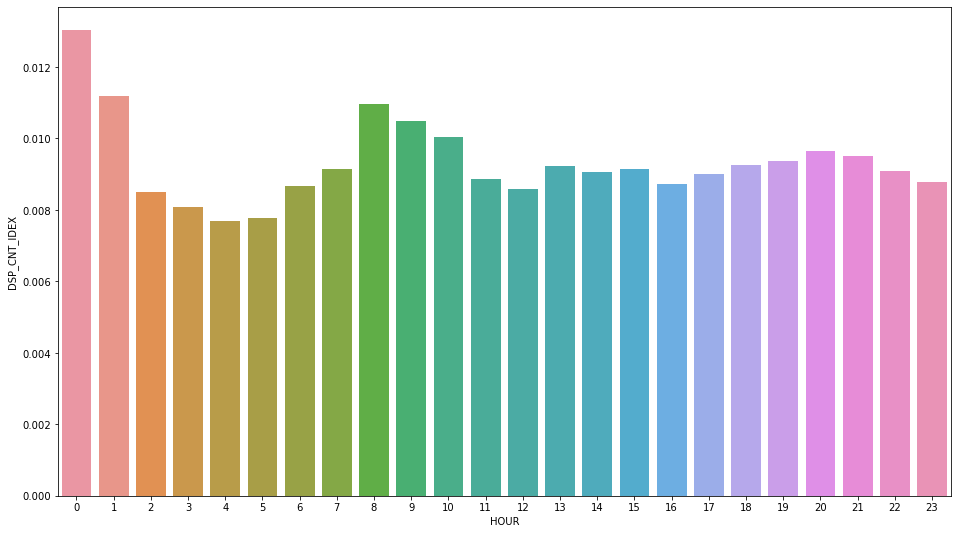

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn barplot
plt.figure(figsize = (16,9))
sns.barplot(x="HOUR", y="DSP_CNT_IDEX", data=time_idex)

## 요일별 출동 빈도 시각화

In [16]:

weekday_idx = pd.pivot_table(df, values= "DSP_CNT_IDEX" , index=['WEEKDAY'], aggfunc=np.mean)
weekday_idx["WEEKDAY"] = weekday_idx.index.values
weekday_idx



,DSP_CNT_IDEX,WEEKDAY
WEEKDAY,,
0,0.01007,0
1,0.00953,1
2,0.00946,2
3,0.00912,3
4,0.00929,4
5,0.00880,5
6,0.00900,6


<AxesSubplot:xlabel='WEEKDAY', ylabel='DSP_CNT_IDEX'>

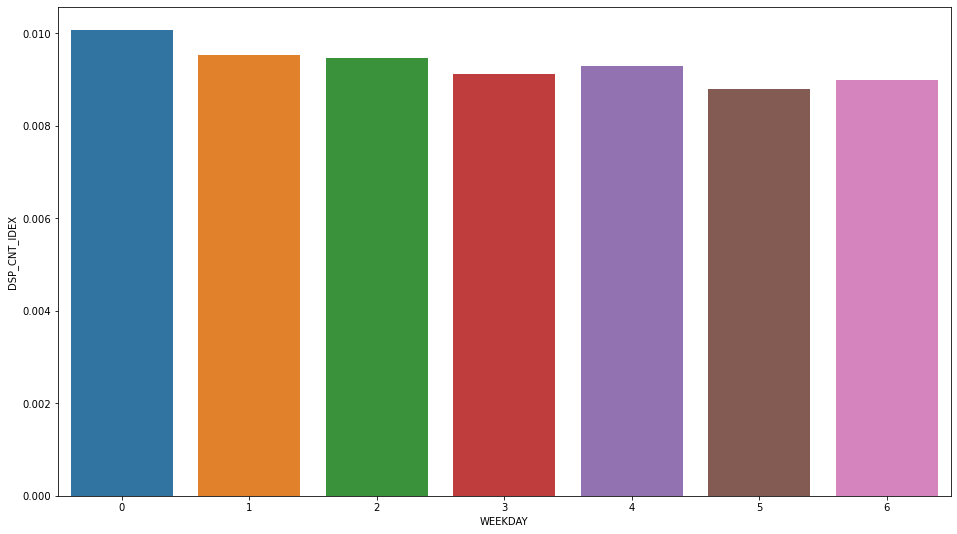

In [17]:
plt.figure(figsize = (16,9))
sns.barplot(x="WEEKDAY", y="DSP_CNT_IDEX", data=weekday_idx)


## 월별 출동 빈도 지수 시각화

In [18]:

month_idx = pd.pivot_table(df, values= ["DSP_CNT_IDEX"] , index=['MONTH'], aggfunc=np.mean)
month_idx["MONTH"] = month_idx.index.values
month_idx



,DSP_CNT_IDEX,MONTH
MONTH,,
1,0.00935,1
2,0.00969,2
3,0.00851,3
4,0.00884,4
5,0.00942,5
6,0.00975,6
7,0.00975,7
8,0.01051,8
9,0.00936,9


<AxesSubplot:xlabel='MONTH', ylabel='DSP_CNT_IDEX'>

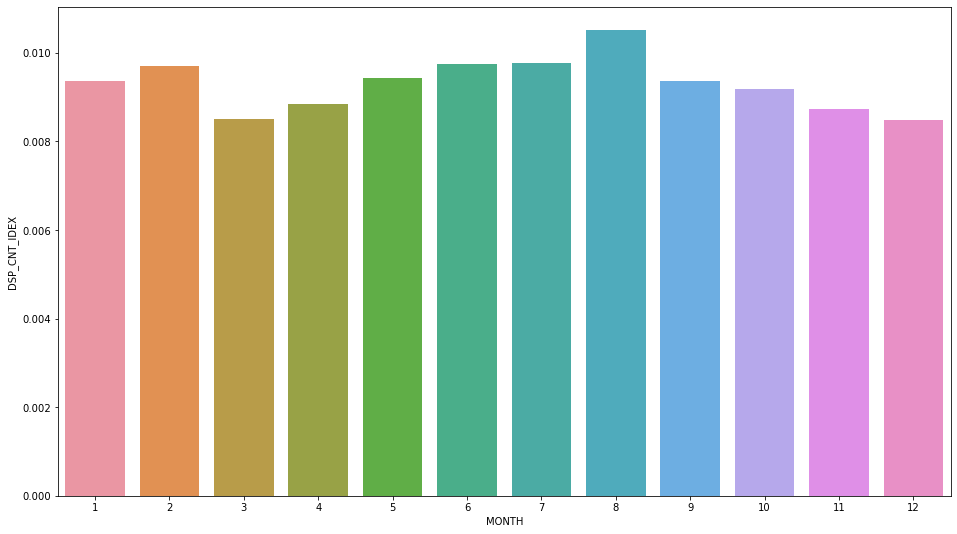

In [19]:
plt.figure(figsize = (16,9))
sns.barplot(x="MONTH", y="DSP_CNT_IDEX", data=month_idx)

# 전처리 및 학습데이터셋 생성

## 출동 빈도가 높은 데이터 추출

In [20]:
## 격자 중에 출동이 50 번이 넘게 COUNT 되는 격자 추출 = 46개 격자
many_dsp = np.where(rect_table["DSP_CNT_IDEX"] > 50)[0]
many_dsp , len(rect_table.values[many_dsp])

(array([121, 145, 146, 171, 268, 340, 342, 365, 368, 369, 370, 371, 394,
        395, 396, 397, 398, 399, 400, 402, 419, 420, 421, 422, 423, 425,
        426, 428, 436, 437, 438, 439, 440, 441, 442, 443, 444, 447, 455,
        456, 457, 458, 475, 477, 497, 621], dtype=int64),
 46)

In [21]:
# 격자 중에 출동이 50 번이 넘게 COUNT 되는 격자 GRID_ID 값들
many_dsp_GRID_ID = rect_table.index.values[many_dsp]
many_dsp_GRID_ID

array([38345224, 38445234, 38445244, 38545244, 38945304, 39245194,
       39245214, 39345224, 39345254, 39345264, 39345274, 39345284,
       39445244, 39445254, 39445264, 39445274, 39445284, 39445294,
       39445304, 39445324, 39545244, 39545254, 39545264, 39545274,
       39545284, 39545304, 39545314, 39545334, 39645234, 39645244,
       39645254, 39645264, 39645274, 39645284, 39645294, 39645304,
       39645314, 39645344, 39745234, 39745244, 39745254, 39745264,
       39845244, 39845264, 39945254, 40745144], dtype=int64)

In [22]:
many_dsp_df = df[df["GRID_ID"].apply(lambda x :  x in many_dsp_GRID_ID)]

# 38만 ROW 데이터
many_dsp_df

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,MONTH,DAY,WEEKDAY
12,38345224,383475,522475,0,20200101,4213000000,4.18000,0.34000,0,0,0,0,0,0,0,0,1,1,2
19,38445234,384475,523475,0,20200101,4213000000,340.74000,28.71000,0,0,0,0,0,0,0,0,1,1,2
20,38445244,384475,524475,0,20200101,4213000000,156.82000,9.65000,0,0,0,0,0,0,0,0,1,1,2
27,38545244,385475,524475,0,20200101,4213000000,219.92000,13.15000,0,0,0,0,0,0,0,0,1,1,2
49,38945304,389475,530475,0,20200101,4213000000,51.71000,1.40000,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769032,39745264,397475,526475,23,20201230,4213000000,3865.51000,331.79000,0,0,0,0,0,0,0,0,12,30,2
1769045,39845244,398475,524475,23,20201230,4213000000,984.48000,48.15000,0,0,0,0,0,0,0,0,12,30,2
1769047,39845264,398475,526475,23,20201230,4213000000,516.59000,67.30000,0,0,0,0,0,0,0,0,12,30,2
1769057,39945254,399475,525475,23,20201230,4213000000,1415.55000,84.09000,0,0,0,0,0,0,0,0,12,30,2


In [23]:
# 전체 데이터 대신 추출데이터 사용
df = many_dsp_df

## One-Hot-Encoding

- **pd.get_dummies() : 범주형 변수를 희소행렬로 One-Hot-Encoding**

In [24]:
ENC_GRID_ID_df = pd.get_dummies(df["GRID_ID"])
ENC_GRID_ID_df

,38345224,38445234,38445244,38545244,38945304,39245194,39245214,39345224,39345254,39345264,...,39645314,39645344,39745234,39745244,39745254,39745264,39845244,39845264,39945254,40745144
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1769045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1769047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1769057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 학습/테스트 데이터셋 구축

- **pd.concat() : 데이터프레임 합치기**

In [25]:

## 입력 데이터셋 = [OneHotEncoding 된 격자 id 데이터 / 격자 X 좌표 / 격자 Y 좌표 / 월 / 날짜 / 요일 / 시간대]

X_df = df[["GRID_X_AXIS" , "GRID_Y_AXIS" , "MONTH" , "DAY" , "WEEKDAY" , "TIME" ]]
X_df = pd.concat( [ENC_GRID_ID_df , X_df ] , axis = 1)

Y_df = df[["DSP_CNT_IDEX"]]

X_df.shape , Y_df.shape


((386050, 52), (386050, 1))

- **train_test_split()  :  학습데이터 / 테스트 데이터 분할**

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X_df , Y_df , test_size = 0.3  , random_state=2045)

In [27]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((270235, 52), (115815, 52), (270235, 1), (115815, 1))

# 출동 빈도 지수 예측 모델

## RandomForest Model

In [28]:
%%time

from sklearn.ensemble import RandomForestRegressor

# RandomForest 모델 생성
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 15)

# 학습데이터셋으로 학습
rf_model.fit(X_train, Y_train)

Wall time: 1min 18s


RandomForestRegressor(random_state=15)

In [29]:
from sklearn.metrics import mean_squared_error

preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))

print("RF - RMSE: %f" % (rmse))

RF - RMSE: 0.212103


In [36]:
# 답안지에 적을 데이터
Results_2 = []

# 해당 날짜들
Pred_Dates = [20200131 , 20200228 , 20200331 , 20200430 , 20200531 , 20200630 , 20200731 , 20200831 , 20200930 , 20201031 , 20201130 , 20201231]

# 시간대 (0 ~ 23)
Hours = [i for i in range(24)]

# 격자들
Grid_IDs = df["GRID_ID"].unique()

for date in Pred_Dates:

  Inputs = []
  grid_id_lst = []
  hour_lst = []

  for hour in Hours:
    for grid_id in Grid_IDs:

      # 날짜로부터 년/월/일자/요일 계산
      year = int(date/10000)
      month = int(date%10000/100)    
      day = int(date%10000%100)  
      weekday =  datetime.date(year,month,day).weekday()

      # 격자 ID 로부터 격자 X 좌표 / 격자 Y 좌표 계산
      grid_x = int(grid_id/10000)*100 + 75
      grid_y = int(grid_id%10000)*100 + 75

      #scaled_grid_x = X_scaler.transform(np.array(grid_x).reshape(1,-1))[0][0]
      #scaled_grid_y = Y_scaler.transform(np.array(grid_y).reshape(1,-1))[0][0]

      # 입력 변수 = 격자 ID / 격자 X / 격자 Y / 달 / 일 / 요일 / 시간
      #input = [grid_id , grid_x , grid_y  , month , day , weekday , hour]
      #Inputs.append(input)

      input = [0 for _ in range(46)]
      input[list(many_dsp_GRID_ID).index(grid_id)] = 1
      input += [grid_x , grid_y , month , day , weekday , hour]
      Inputs.append(input)
      grid_id_lst.append(grid_id)
      
  # 예측값들
  Inputs_df = pd.DataFrame(data=Inputs , columns=X_df.columns.values)
  pred_val = rf_model.predict(Inputs_df) 
  #pred_val = model.predict(np.array(Inputs))

  max_idx = np.argmax(pred_val)
  max_dsp = np.max(pred_val)
  max_id = grid_id_lst[max_idx]
  max_hour = Inputs[max_idx][-1]


  # 해당날짜에 데이터 추가
  Results_2.append([date , max_id , max_hour , max_dsp])

Results_2

[[20200131, 39545274, 16, 1.67],
 [20200228, 39545274, 15, 1.36],
 [20200331, 39545284, 7, 1.08],
 [20200430, 39445274, 23, 0.78],
 [20200531, 39545334, 12, 0.85],
 [20200630, 39545274, 15, 0.65],
 [20200731, 39545274, 15, 1.03],
 [20200831, 39545274, 15, 2.54],
 [20200930, 39345254, 14, 0.75],
 [20201031, 39545244, 0, 1.69],
 [20201130, 39245214, 12, 0.96],
 [20201231, 39345274, 2, 1.24]]

In [38]:
# 결과 이쁘게 출력
for result in Results_2:
  print(" 입력 날짜 : " , result[0] , "  입력 격자 : " , result[1]  , "  시간대 : "  , result[2] , "  출동빈도지수 : " , result[3])

 입력 날짜 :  20200131   입력 격자 :  39545274   시간대 :  16   출동빈도지수 :  1.67
 입력 날짜 :  20200228   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  1.36
 입력 날짜 :  20200331   입력 격자 :  39545284   시간대 :  7   출동빈도지수 :  1.08
 입력 날짜 :  20200430   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.78
 입력 날짜 :  20200531   입력 격자 :  39545334   시간대 :  12   출동빈도지수 :  0.85
 입력 날짜 :  20200630   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  0.65
 입력 날짜 :  20200731   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  1.03
 입력 날짜 :  20200831   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  2.54
 입력 날짜 :  20200930   입력 격자 :  39345254   시간대 :  14   출동빈도지수 :  0.75
 입력 날짜 :  20201031   입력 격자 :  39545244   시간대 :  0   출동빈도지수 :  1.69
 입력 날짜 :  20201130   입력 격자 :  39245214   시간대 :  12   출동빈도지수 :  0.96
 입력 날짜 :  20201231   입력 격자 :  39345274   시간대 :  2   출동빈도지수 :  1.24


In [39]:
rect_table[rect_table["GRID_ID"] == 39345274]

,DSP_CNT_IDEX,GRID_ID
GRID_ID,,
39345274,325,39345274


## XGBoost Model

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
%%time

import xgboost

xgb_model = xgboost.XGBRegressor(n_estimators=120, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train,Y_train)


Wall time: 10.4 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
from sklearn.metrics import mean_squared_error

preds = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("XGB - RMSE: %f" % (rmse))

XGB - RMSE: 0.195205


In [43]:


# 답안지에 적을 데이터
Results = []

# 해당 날짜들
Pred_Dates = [20200131 , 20200228 , 20200331 , 20200430 , 20200531 , 20200630 , 20200731 , 20200831 , 20200930 , 20201031 , 20201130 , 20201231]

# 시간대 (0 ~ 23)
Hours = [i for i in range(24)]

# 격자들
Grid_IDs = df["GRID_ID"].unique()

for date in Pred_Dates:

  Inputs = []
  grid_id_lst = []
  hour_lst = []

  for hour in Hours:
    for grid_id in Grid_IDs:

      # 날짜로부터 년/월/일자/요일 계산
      year = int(date/10000)
      month = int(date%10000/100)    
      day = int(date%10000%100)  
      weekday =  datetime.date(year,month,day).weekday()

      # 격자 ID 로부터 격자 X 좌표 / 격자 Y 좌표 계산
      grid_x = int(grid_id/10000)*100 + 75
      grid_y = int(grid_id%10000)*100 + 75

      #scaled_grid_x = X_scaler.transform(np.array(grid_x).reshape(1,-1))[0][0]
      #scaled_grid_y = Y_scaler.transform(np.array(grid_y).reshape(1,-1))[0][0]

      # 입력 변수 = 격자 ID / 격자 X / 격자 Y / 달 / 일 / 요일 / 시간
      #input = [grid_id , grid_x , grid_y  , month , day , weekday , hour]
      #Inputs.append(input)

      input = [0 for _ in range(46)]
      input[list(many_dsp_GRID_ID).index(grid_id)] = 1
      input += [grid_x , grid_y , month , day , weekday , hour]
      Inputs.append(input)
      grid_id_lst.append(grid_id)
      
  # 예측값들
  Inputs_df = pd.DataFrame(data=Inputs , columns=X_df.columns.values)
  pred_val = xgb_model.predict(Inputs_df) 
  #pred_val = model.predict(np.array(Inputs))


  max_idx = np.argmax(pred_val)
  max_dsp = np.max(pred_val)
  max_id = grid_id_lst[max_idx]
  max_hour = Inputs[max_idx][-1]


  # 해당날짜에 데이터 추가
  Results.append([date , max_id , max_hour , max_dsp])

Results

[[20200131, 39545274, 16, 1.207318],
 [20200228, 39545274, 15, 0.73778945],
 [20200331, 39445274, 23, 0.48887238],
 [20200430, 39445274, 23, 0.58249617],
 [20200531, 39545274, 14, 0.291864],
 [20200630, 39445274, 23, 0.27446032],
 [20200731, 39545274, 15, 0.710096],
 [20200831, 39545274, 15, 2.3773096],
 [20200930, 39545274, 15, 1.7648607],
 [20201031, 39545274, 15, 1.4530761],
 [20201130, 39545274, 23, 0.38891292],
 [20201231, 39545274, 23, 0.46656603]]

In [44]:
# 결과 이쁘게 출력
for i,result in enumerate(Results):
  print(" XGBoost 예측 - 입력 날짜 : " , result[0] , "  입력 격자 : " , result[1]  , "  시간대 : "  , result[2] , "  출동빈도지수 : " , result[3])

  print(" RandomForest 예측 - 입력 날짜 : " , Results_2[i][0] , "  입력 격자 : " , Results_2[i][1]  , "  시간대 : "  , Results_2[i][2] , "  출동빈도지수 : " , Results_2[i][3])

 XGBoost 예측 - 입력 날짜 :  20200131   입력 격자 :  39545274   시간대 :  16   출동빈도지수 :  1.207318
 RandomForest 예측 - 입력 날짜 :  20200131   입력 격자 :  39545274   시간대 :  16   출동빈도지수 :  1.67
 XGBoost 예측 - 입력 날짜 :  20200228   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  0.73778945
 RandomForest 예측 - 입력 날짜 :  20200228   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  1.36
 XGBoost 예측 - 입력 날짜 :  20200331   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.48887238
 RandomForest 예측 - 입력 날짜 :  20200331   입력 격자 :  39545284   시간대 :  7   출동빈도지수 :  1.08
 XGBoost 예측 - 입력 날짜 :  20200430   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.58249617
 RandomForest 예측 - 입력 날짜 :  20200430   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.78
 XGBoost 예측 - 입력 날짜 :  20200531   입력 격자 :  39545274   시간대 :  14   출동빈도지수 :  0.291864
 RandomForest 예측 - 입력 날짜 :  20200531   입력 격자 :  39545334   시간대 :  12   출동빈도지수 :  0.85
 XGBoost 예측 - 입력 날짜 :  20200630   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.27446032
 RandomForest 예측 - 입력 날짜 :  20200630   입력 격자 :  39545

## DNN Model

In [45]:
X_dnn_df = df[["GRID_X_AXIS" , "GRID_Y_AXIS" , "MONTH" , "DAY" , "WEEKDAY" , "TIME" ]]
X_dnn_df = pd.concat( [ENC_GRID_ID_df , X_dnn_df ] , axis = 1)

Y_dnn_df = df[["DSP_CNT_IDEX"]]

X_dnn_df.shape , Y_df.shape

((386050, 52), (386050, 1))

In [46]:
%%time

import tensorflow as tf
from keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
from keras import optimizers


## 모델 생성 
model = Sequential()
model.add(Dense(64 , input_dim = 52 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae' , 'mse'])


# 모델 학습
hist = model.fit(X_train , Y_train , epochs = 10 , batch_size = 16)



Epoch 1/10
16890/16890 [==============================] - 11s 625us/step - loss: 3337895.0000 - mae: 240.4907 - mse: 3337895.0000
Epoch 2/10
16890/16890 [==============================] - 11s 627us/step - loss: 55.3638 - mae: 0.1462 - mse: 55.3638
Epoch 3/10
16890/16890 [==============================] - 11s 641us/step - loss: 55.2186 - mae: 0.1242 - mse: 55.2186
Epoch 4/10
16890/16890 [==============================] - 11s 628us/step - loss: 6.7770 - mae: 0.0727 - mse: 6.7770
Epoch 5/10
16890/16890 [==============================] - 11s 638us/step - loss: 0.7943 - mae: 0.0681 - mse: 0.7943
Epoch 6/10
16890/16890 [==============================] - 11s 666us/step - loss: 2.5622 - mae: 0.0685 - mse: 2.5622
Epoch 7/10
16890/16890 [==============================] - 11s 630us/step - loss: 0.1681 - mae: 0.0648 - mse: 0.1681
Epoch 8/10
16890/16890 [==============================] - 10s 618us/step - loss: 0.0388 - mae: 0.0624 - mse: 0.0388
Epoch 9/10
16890/16890 [==============================

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [48]:
from sklearn.metrics import mean_squared_error

# 테스트데이터 예측 및 RMSE 계산
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("DNN Model - RMSE: %f" % (rmse))

DNN Model - RMSE: 0.196502


In [52]:

# 답안지에 적을 데이터
Results = []

# 해당 날짜들
Pred_Dates = [20200131 , 20200228 , 20200331 , 20200430 , 20200531 , 20200630 , 20200731 , 20200831 , 20200930 , 20201031 , 20201130 , 20201231]

# 시간대 (0 ~ 23)
Hours = [i for i in range(24)]

# 격자들
Grid_IDs = df["GRID_ID"].unique()

for date in Pred_Dates:

  Inputs = []
  grid_id_lst = []
  hour_lst = []

  for hour in Hours:
    for grid_id in Grid_IDs:

      # 날짜로부터 년/월/일자/요일 계산
      year = int(date/10000)
      month = int(date%10000/100)    
      day = int(date%10000%100)  
      weekday =  datetime.date(year,month,day).weekday()

      # 격자 ID 로부터 격자 X 좌표 / 격자 Y 좌표 계산
      grid_x = int(grid_id/10000)*100 + 75
      grid_y = int(grid_id%10000)*100 + 75

      #grid_x = X_scaler.transform(np.array(grid_x).reshape(1,-1))[0][0]
      #grid_y = Y_scaler.transform(np.array(grid_y).reshape(1,-1))[0][0]

      # 입력 변수 = 격자 ID / 격자 X / 격자 Y / 달 / 일 / 요일 / 시간
      input = [0 for _ in range(46)]
      input[list(many_dsp_GRID_ID).index(grid_id)] = 1
      input += [grid_x , grid_y , month , day , weekday , hour]

      Inputs.append(input)
      grid_id_lst.append(grid_id)

  # 예측값들
  Inputs_df= pd.DataFrame(data=Inputs , columns=X_dnn_df.columns.values)
  pred_val = model.predict(Inputs_df) 

  max_idx = np.argmax(pred_val)
  max_dsp = np.max(pred_val)
  max_id = grid_id_lst[max_idx]
  max_hour = Inputs[max_idx][-1]


  # 해당날짜에 데이터 추가
  Results.append([date , max_id , max_hour , max_dsp])

Results

[[20200131, 38345224, 0, 0.03609238],
 [20200228, 38345224, 0, 0.03609238],
 [20200331, 38345224, 0, 0.03609238],
 [20200430, 38345224, 0, 0.03609238],
 [20200531, 38345224, 0, 0.03609238],
 [20200630, 38345224, 0, 0.03609238],
 [20200731, 38345224, 0, 0.03609238],
 [20200831, 38345224, 0, 0.03609238],
 [20200930, 38345224, 0, 0.03609238],
 [20201031, 38345224, 0, 0.03609238],
 [20201130, 38345224, 0, 0.03609238],
 [20201231, 38345224, 0, 0.03609238]]

In [53]:
for result in Results:
  print(" 입력 날짜 : " , result[0] , "  입력 격자 : " , result[1]  , "  시간대 : "  , result[2] , "  출동빈도지수 : " , result[3])

 입력 날짜 :  20200131   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200228   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200331   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200430   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200531   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200630   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200731   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200831   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20200930   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20201031   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20201130   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 입력 날짜 :  20201231   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238


In [54]:
# 결과 이쁘게 출력
for i,result in enumerate(Results):
    print(" XGBoost 예측 - 입력 날짜 : " , result[0] , "  입력 격자 : " , result[1]  , "  시간대 : "  , result[2] , "  출동빈도지수 : " , result[3])

    print(" RandomForest 예측 - 입력 날짜 : " , Results_2[i][0] , "  입력 격자 : " , Results_2[i][1]  , "  시간대 : "  , Results_2[i][2] , "  출동빈도지수 : " , Results_2[i][3])

    print(" DNN 예측 - 입력 날짜 : " , result[0] , "  입력 격자 : " , result[1]  , "  시간대 : "  , result[2] , "  출동빈도지수 : " , result[3])   

 XGBoost 예측 - 입력 날짜 :  20200131   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 RandomForest 예측 - 입력 날짜 :  20200131   입력 격자 :  39545274   시간대 :  16   출동빈도지수 :  1.67
 DNN 예측 - 입력 날짜 :  20200131   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 XGBoost 예측 - 입력 날짜 :  20200228   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 RandomForest 예측 - 입력 날짜 :  20200228   입력 격자 :  39545274   시간대 :  15   출동빈도지수 :  1.36
 DNN 예측 - 입력 날짜 :  20200228   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 XGBoost 예측 - 입력 날짜 :  20200331   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 RandomForest 예측 - 입력 날짜 :  20200331   입력 격자 :  39545284   시간대 :  7   출동빈도지수 :  1.08
 DNN 예측 - 입력 날짜 :  20200331   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 XGBoost 예측 - 입력 날짜 :  20200430   입력 격자 :  38345224   시간대 :  0   출동빈도지수 :  0.03609238
 RandomForest 예측 - 입력 날짜 :  20200430   입력 격자 :  39445274   시간대 :  23   출동빈도지수 :  0.78
 DNN 예측 - 입력 날짜 :  20200430   입력 격자 :  38345224   시간대 :  0   출동빈도지수